# IMPORT THE LIBRARIES

In [1]:
#which libraries to use?
import pandas as pd
import tweepy
import numpy as np
import re
import matplotlib.pyplot as plt
import plotly.express as px
plt.style.use("fivethirtyeight")
from wordcloud import WordCloud
from textblob import TextBlob
from dash import Input, Output,dcc,html
from jupyter_dash import JupyterDash

# SCRAPE THE DATA FROM TWITTER

CREATE A FUNCTION THAT SCRAPES DATA

In [2]:
def scrape_data(bearer_token,query):
    
    #read the data from twitter using client api
    client = tweepy.Client(bearer_token)
    #get the query
    query = query
    #create a response
    tweets = client.search_recent_tweets(query=query,
                                        max_results=100,
                                        tweet_fields=["created_at","lang"])
    #create an empty list
    x = []
    
    #loop through the tweets
    for tweet in tweets.data:
        #take the tweets and append them into our list
        x.append(tweet)
        #convert values in the lists into a dataframe
        df = pd.DataFrame(x)
        
        #return dataframe to the user
    return df
    

USE THE FUNCTION TO PRINT OUT THE DATA COLLECTED FROM TWITTER (Elon Musk's Tweets)

In [3]:
#function call
df = scrape_data("AAAAAAAAAAAAAAAAAAAAANIOfgEAAAAADY80ZnbEX4%2Fi9BDZxR49IF9uCw0%3DdiisCzlfDYVNJOlwo31FuAzDa4FyygTJVgHMaO65L7qmHNzr6a",
                  "from:ElonMusk -is:retweet")
#print the first 5 columns
df.head()

,created_at,id,lang,text
0,2022-08-02 23:52:48+00:00,1554616237174431750,en,@Teslarati @YahooFinance @PeteButtigieg @Tesla...
1,2022-08-02 23:52:03+00:00,1554616046040059909,en,The ratio of digital to biological compute is ...
2,2022-08-02 22:32:55+00:00,1554596132281585664,en,@SirineAti A *successful* orbital flight is pr...
3,2022-08-02 22:31:22+00:00,1554595742748229634,und,@GalaxyHeroesGHC X
4,2022-08-02 22:30:31+00:00,1554595528276590595,und,@RationalEtienne 🤣💯


# CLEAN THE DATA

CREATE A FUNCTION THAT CLEANS THE DATA

In [4]:
#create a wrangle function
def wrangle(text):
    #use regular expression to clean the data
    text = re.sub(r"@[A-Za-z0-9]+"," ",text) #removes @mentions
    text = re.sub(r"#"," ",text) #remove the hashtag
    text = re.sub(r"RT[\s]+"," ",text) #removing RT
    text = re.sub(r"https?:\/\/\s+"," ",text) #removes the links
    text = re.sub(r"https://+"," ",text)
    
    
    #return the dataframe
    return text

In [5]:
#apply the funtions
df["text"] = df["text"].apply(wrangle)
df.head()

,created_at,id,lang,text
0,2022-08-02 23:52:48+00:00,1554616237174431750,en,Cool
1,2022-08-02 23:52:03+00:00,1554616046040059909,en,The ratio of digital to biological compute is ...
2,2022-08-02 22:32:55+00:00,1554596132281585664,en,A *successful* orbital flight is probably be...
3,2022-08-02 22:31:22+00:00,1554595742748229634,und,X
4,2022-08-02 22:30:31+00:00,1554595528276590595,und,🤣💯


# SUBJECTIVITY AND POLARITY

In [6]:
#create a function for subjectivity
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

In [7]:
#create a function for the polarity
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

CREATE TWO NEW COLUMNS [SUBJECTIVITY AND POLARITY]

In [8]:
#create new columns
df["subjectivity"] = df["text"].apply(getSubjectivity)
df["polarity"] = df["text"].apply(getPolarity)
#print the first 5 rows
df.head()

,created_at,id,lang,text,subjectivity,polarity
0,2022-08-02 23:52:48+00:00,1554616237174431750,en,Cool,0.650000,0.350000
1,2022-08-02 23:52:03+00:00,1554616046040059909,en,The ratio of digital to biological compute is ...,0.233333,0.166667
2,2022-08-02 22:32:55+00:00,1554596132281585664,en,A *successful* orbital flight is probably be...,0.950000,0.750000
3,2022-08-02 22:31:22+00:00,1554595742748229634,und,X,0.000000,0.000000
4,2022-08-02 22:30:31+00:00,1554595528276590595,und,🤣💯,0.000000,0.000000


**

PLOT FREQUENTLY USED WORDS

**

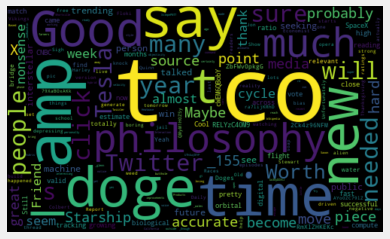

In [9]:
#plot a wordcloud
all_words = " ".join([twt for twt in df["text"]])
wordcloud = WordCloud(width=500,height=300,
                      random_state=41,max_font_size=119).generate(all_words)

#plot using matplotlib
plt.imshow(wordcloud,interpolation="bilinear")
plt.axis("off")
plt.show()

# COMPUTE THE NEGATIVE, POSITIVE AND NEUTRAL ANALYSIS

CREATE A FUNCTION 

In [10]:
#write down the code
def getAnalysis(score):
    #create an if function
    if score < 0:
        return "Negative"
    elif score == 0:
        return "Neutral"
    else:
        return "Positive"

#create a new column
df["Analysis"] = df["polarity"].apply(getAnalysis)
df.head()

,created_at,id,lang,text,subjectivity,polarity,Analysis
0,2022-08-02 23:52:48+00:00,1554616237174431750,en,Cool,0.650000,0.350000,Positive
1,2022-08-02 23:52:03+00:00,1554616046040059909,en,The ratio of digital to biological compute is ...,0.233333,0.166667,Positive
2,2022-08-02 22:32:55+00:00,1554596132281585664,en,A *successful* orbital flight is probably be...,0.950000,0.750000,Positive
3,2022-08-02 22:31:22+00:00,1554595742748229634,und,X,0.000000,0.000000,Neutral
4,2022-08-02 22:30:31+00:00,1554595528276590595,und,🤣💯,0.000000,0.000000,Neutral


PRINT POSITIVE TWEETS

In [11]:
#print all of the positive tweets
j = 1
sortedDF = df.sort_values(by=["polarity"])
for i in range(0,sortedDF.shape[0]):
    #check if polarity
    if (sortedDF["Analysis"][i] == "Positive"):
        print(str(j)+') '+sortedDF["text"][i])
        print()
        j=j+1

1)           Cool

2) The ratio of digital to biological compute is growing fast. Worth tracking.

3)   A *successful* orbital flight is probably between 1 and 12 months from now

4) Just came across this pretty good CNBC piece on SpaceX &amp; Starship  t.co/RELYzC40M9

5)   That estimate seems high, but the point is valid

6) Worth reading. This is a close match for my philosophy.  t.co/cWEM6QBobY

7)  _155 So much water under the bridge since then

8)       It sure is hard to find a news source that’s accurate, relevant &amp; not totally depressing! 

Old-school version of The Economist &amp; Jon Stewart Daily Show / Colbert Report were great.

9) Thanksgiving last year after watching one too many episodes of Vikings  t.co/ra7lijKRhD

10) Maybe free some people in jail for weed here too?  t.co/AYo0ZC79lZ

11)     Good thread

12)   We live in interesting times

13) Interaction with almost all twitter accounts seem to be much lower in recent weeks &amp; days. Accurate?

14)   Great st

PRINT NEGATIVE TWEETS

In [12]:
#print all of the negative tweets
j = 1
sortedDF = df.sort_values(by=["polarity"],ascending=False)
for i in range(0,sortedDF.shape[0]):
    #check if polarity
    if (sortedDF["Analysis"][i] == "Negative"):
        print(str(j)+') '+sortedDF["text"][i])
        print()
        j=j+1

1)     The media has strong negative bias &amp; are driven by clicks (they can’t help it).

Unfortunately, I generate lots of clicks.

But these things move in cycles.

When it starts boring readers to knock me down, they will build me up. 

This cycle has happened so many times …

2) If our reality is actually an alien soap opera, our ratings would be 🚀💥💫

3) Some people are no nonsense, but, personally, I like a little nonsense

4) Inflation might be trending down

5) Much harder to make friends than enemies. My skill at the latter is improving.

6)   Sub lightspeed is all that’s needed to be interstellar. Intergalactic is tough.



PLOT POLARITY AND SENTIMENT ANALYSIS

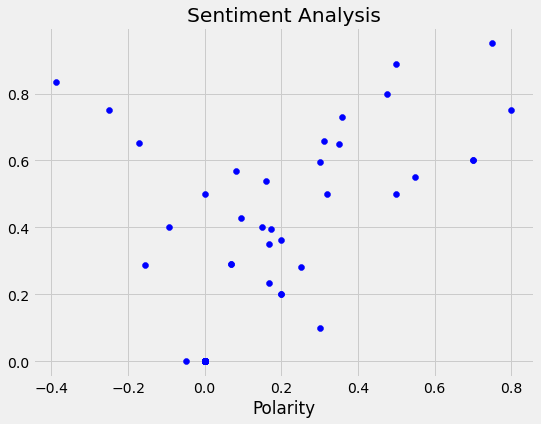

In [13]:
#plot polarity and subjectivity
plt.figure(figsize=(8,6))
for i in  range(0,df.shape[0]):
    plt.scatter(df["polarity"][i],df["subjectivity"][i],
               color="Blue")
plt.title("Sentiment Analysis")
plt.xlabel("Polarity")
plt.show()

PRINT SOME METRICS

In [14]:
#get the percentage of positive tweets
pos_tweets = df[df.Analysis=="Positive"]
pos_tweets = pos_tweets["text"]

print("Percentage of Positive Tweets",round(pos_tweets.shape[0]/df.shape[0],2))

Percentage of Positive Tweets 0.42


In [15]:
#get the percentage of negative tweets
neg_tweets = df[df.Analysis=="Negative"]
neg_tweets = neg_tweets["text"]

print("Percentage of Negative Tweets",round(neg_tweets.shape[0]/df.shape[0],2))

Percentage of Negative Tweets 0.09


In [16]:
#get the percentage of negative tweets
neutral_tweets = df[df.Analysis=="Neutral"]
neutral_tweets = neutral_tweets["text"]

print("Percentage of Neutral Tweets",round(neutral_tweets.shape[0]/df.shape[0],2))

Percentage of Neutral Tweets 0.48


CREATE BAR CHART FOR SENTIMENT ANALYSIS

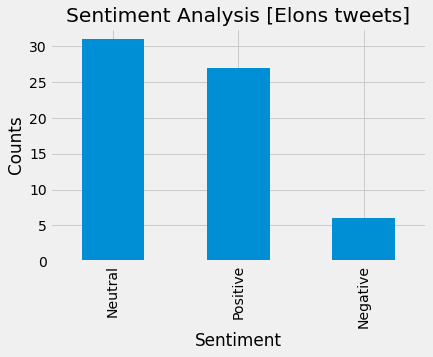

In [17]:
#show the value counts
df["Analysis"].value_counts().plot(kind="bar",
                                  title="Sentiment Analysis [Elons tweets]",
                                  );
plt.xlabel("Sentiment")
plt.ylabel("Counts");


# BUILD OUR DASHBOARD

In [18]:
#instantiate the app
app = JupyterDash(__name__)

CREATE A BAR CHART LAYER

In [19]:
#bar chart service layer
@app.callback(
    Output("bar-chart","figure"),
    Input("Lol","Value")
)
def plot_bar():
    fig = px.bar(x=df["Analysis"])
    
    fig.update_layout(xaxis_title="Sentiment",yaxis_title="Counts")
    
    
    return fig

SCATTER PLOT SERVICE LAYER

In [20]:
def scatter_plot():
    #build a scatter plot
    for i in  range(0,df.shape[0]):
        fig = px.scatter(
                    x=df["polarity"],
                    title= "Sentiment Analysis Scatter Plot")
    #update the figure
    fig.update_layout(xaxis_title="polarity")
    
    #return the fig
    return fig

DEFINE THE LAYOUT OF OUR APP

In [21]:
app.layout = html.Div(
    [
        #App title
        html.H1("SENTIMENT ANALYSIS FOR ELON MUSK'S TWEETS"),
        #bar chart element
        html.H2("BAR CHART"),
        dcc.Graph(figure = plot_bar(),id="bar-chart"),
        
        #add header 3
        html.H3("POLARITY SCATTER PLOT"),
        dcc.Graph(figure=scatter_plot(),id="scatter-plot")
    ]
)

RUN THE APPLICATION

In [22]:
app.run_server()

Dash app running on http://127.0.0.1:8050/
